# Pooch

After reading the [FastTimes article published by Heagy et al. (2022)](https://fasttimesonline.co/geophysical-inversions-to-delineate-rocks-with-co-2-sequestration-potential-through-carbon-mineralization/) I've noticed that I could download the synthetic data they use to produce those inversions. They have uploaded all the data files and the code to reproduce their results to GitHub: https://github.com/simpeg-research/Fast-Times-2021-Carbon-Mineralization

For example, the gravity data file is located in https://raw.githubusercontent.com/simpeg-research/Fast-Times-2021-Carbon-Mineralization/main/3_blocks_model/Assets/grav_data.obs

If I only need that file to play around with my own models, there's no need to git clone the entire repo. I could use Pooch instead to download that particular data file.


## Import Pooch

In [1]:
import pooch

## Fetch the data file

In [2]:
url = "https://raw.githubusercontent.com/simpeg-research/Fast-Times-2021-Carbon-Mineralization/main/3_blocks_model/Assets/grav_data.obs"

In [3]:
fname = pooch.retrieve(url, known_hash="604d36a6c87bef5363ddd3598430acfcd611b549322561f2edfb311e8085a182")
fname

'/home/santi/.cache/pooch/bc30496a01fde107fa2684cd7b7aff5e-grav_data.obs'

## Load the data file

In [9]:
import matplotlib.pyplot as plt
from SimPEG.utils import io_utils, plot2Ddata

In [10]:
gravity_data = io_utils.read_grav3d_ubc(fname)

In [11]:
receiver_locations = gravity_data.survey.receiver_locations

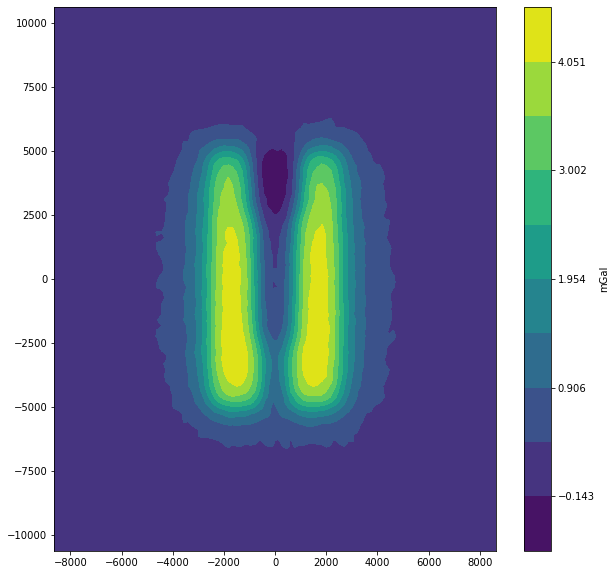

In [24]:
tmp, _ = plot2Ddata(receiver_locations, gravity_data.dobs)
plt.colorbar(tmp, label="mGal")
plt.gca().set_aspect("equal")
plt.gcf().set_size_inches(10, 10)
plt.show()

## Download from DOIs

Pooch also allows us to download files from archives like [Zenodo]() and [figshare]() by passing only the DOI of the object.

For example, we can download the `tiny-data.txt` file in [10.6084/m9.figshare.14763051.v1](https://doi.org/10.6084/m9.figshare.14763051.v1) doing the following:

In [29]:
fname = pooch.retrieve(
    "doi:10.6084/m9.figshare.14763051.v1/tiny-data.txt",
    known_hash="baee0894dba14b12085eacb204284b97e362f4f3e5a5807693cc90ef415c1b2d"
)
fname

'/home/santi/.cache/pooch/56ae252db564e32a5c19824436c185d6-tiny-data.txt'

In [30]:
import numpy as np

data = np.loadtxt(fname)
data

array([1., 2., 3., 4., 5., 6.])